#Modelo preditivo

O modelo implementado visa estimar se um dado cliente de um serviço de Telecom
possui alta ou baixa probabilidade de cancelar sua assinatura. A base de dados
utilizada para os experimentos foi obtida no kaggle, no link abaixo:
https://www.kaggle.com/blastchar/telco-customer-churn

Foram utilizados os algoritmos da Árvore de Decisão e Floresta Aleatório, tendo o último apresentado melhor desempenho.


# Importação dos módulos

In [ ]:
import numpy as np # álgebra linear
import pandas as pd # processamento das bases de dados
import seaborn as sns # gráficos
import matplotlib.pyplot as plt 

# Importação e leitura da base de dados

In [ ]:
df = pd.read_csv('customer_churn.csv') 

df.head() #Exibir os primeiros registros da tabela

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Análise dos dados

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#Tratamento dos dados

Apesar da variável SeniorCitizen ser categórica (o assinante é ou não sênior), a coluna está sendo lida como numérica. Além disso, o valor total já cobrado não está sendo lido como número.

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,'Yes')
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].dtype #verificando se a mudança foi executada

dtype('float64')

#Análise dos dados

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
catvar = [] # conjunto de variáveis categóricas
numvar = [] # conjunto de variáveis numéricas
for i in df.columns:
  if df[i].dtype == object:
    catvar.append(i)
  else:
    numvar.append(i)
unwanted = {'customerID', 'Churn'}
catvar= [e for e in catvar if e not in unwanted]
catvar

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
numvar

['tenure', 'MonthlyCharges', 'TotalCharges']

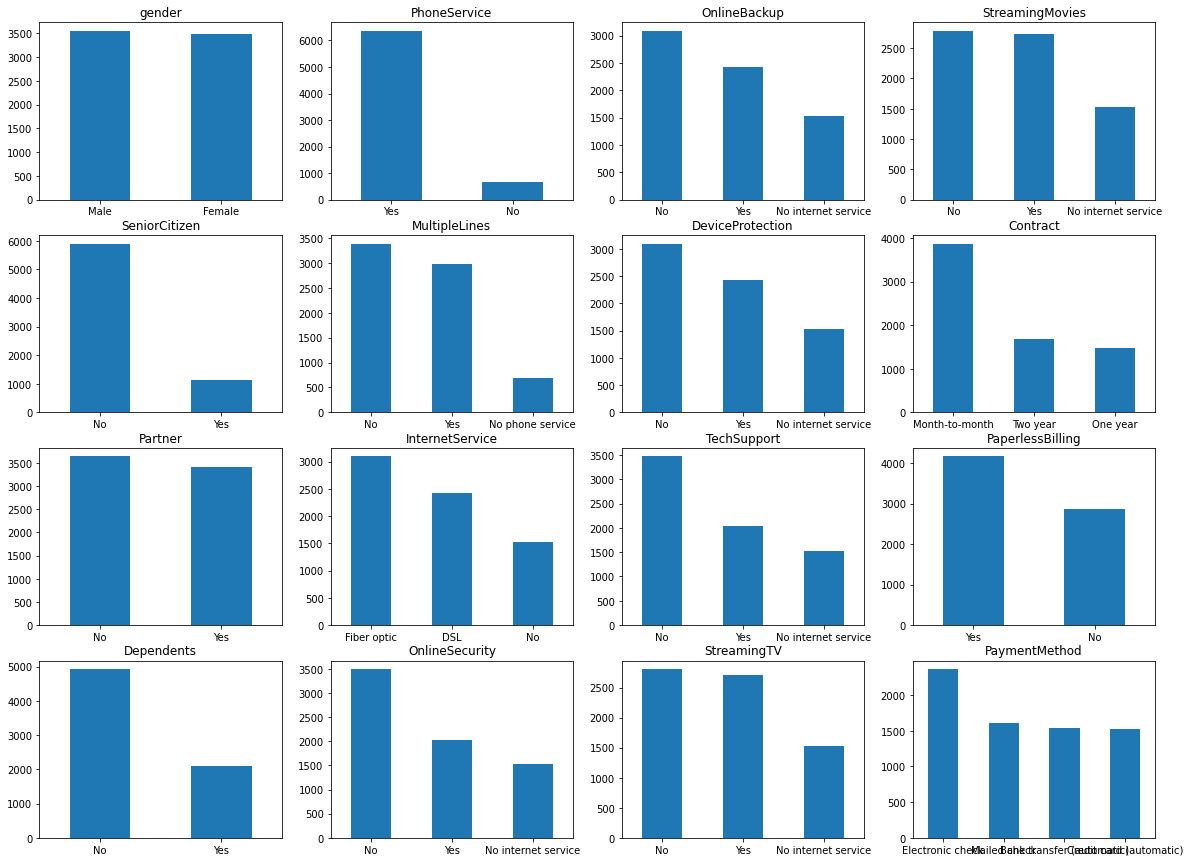

In [ ]:
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (20,15))
for i, item in enumerate(catvar):
    if i < 4:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=4 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-4,1],rot = 0)
        
    elif i >=8 and i < 12:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-8,2],rot = 0)

    elif i < 16:
      ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-12,3],rot=0)
    ax.set_title(item)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

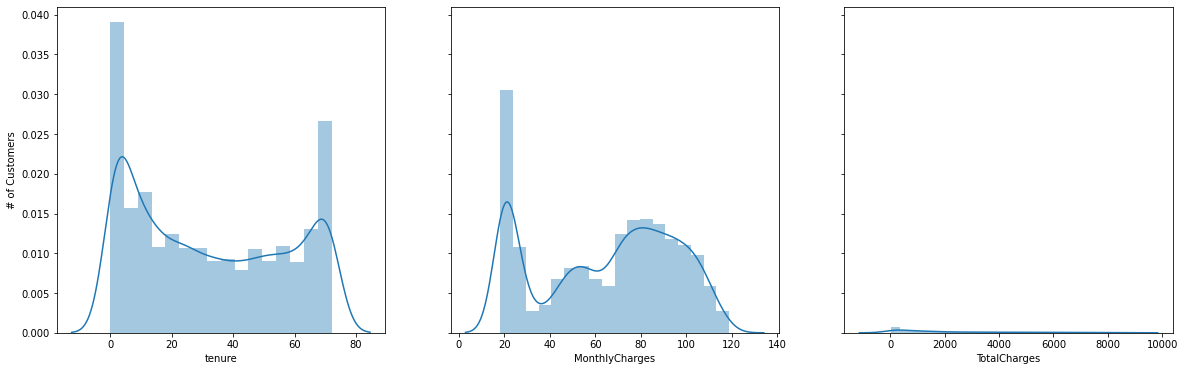

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

for i, item in enumerate(numvar):
  ax = sns.distplot(df[item],ax=axes[i])
  ax.set_ylabel('# of Customers')

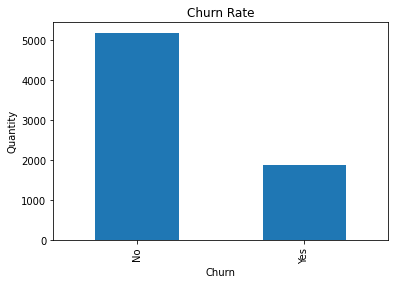

In [ ]:
#Resultado da variável alvo
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Quantity')
df['Churn'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# transformando variáveis categóricas em numéricas para gerar gráfico de correlação
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df.drop(columns='customerID'))
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


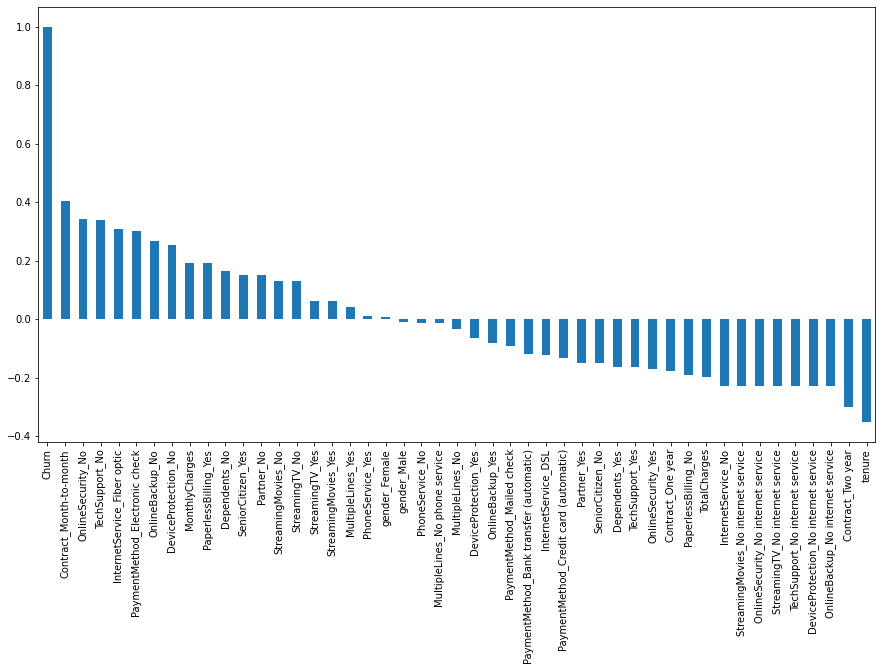

In [ ]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Seleção das variáveis**

Dentre as variáveis numéricas, a que apresenta maior correlação com a variável alvo é *tenure*, que é o tempo de permanência do cliente sob o contrato.

Já entre as categóricas, verifica-se pelo gráfico acima que o tipo de contrato, método de pagamento, segurança online, suporte técnico, backup online, serviços de internet, serviços de Streaming e proteção do dispositivo são as variáveis que maior correlação apresentam com a decisão de cancelamento ou não.

Foram selecionadas as variáveis com correlação maior que 20% em relação à variável alvo. Em seguida, serão avaliadas as correlações entre as variáveis selecionadas, para verificar se há redundância entre elas.

In [ ]:
df_dummies2 = df[['tenure', 'InternetService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                          'StreamingTV', 'StreamingMovies', 'Contract', 
                          'PaymentMethod']]
df_dummies2 = pd.get_dummies(df_dummies2)
df_dummies2.head()

,tenure,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


                                           tenure  ...  PaymentMethod_Mailed check
tenure                                   1.000000  ...                   -0.233852
InternetService_DSL                      0.013274  ...                    0.041899
InternetService_Fiber optic              0.019720  ...                   -0.306834
InternetService_No                      -0.039062  ...                    0.321361
OnlineSecurity_No                       -0.263746  ...                   -0.191715
OnlineSecurity_No internet service      -0.039062  ...                    0.321361
OnlineSecurity_Yes                       0.327203  ...                   -0.080798
OnlineBackup_No                         -0.312694  ...                   -0.099975
OnlineBackup_No internet service        -0.039062  ...                    0.321361
OnlineBackup_Yes                         0.360277  ...                   -0.174164
DeviceProtection_No                     -0.312740  ...                   -0.087422
Devi

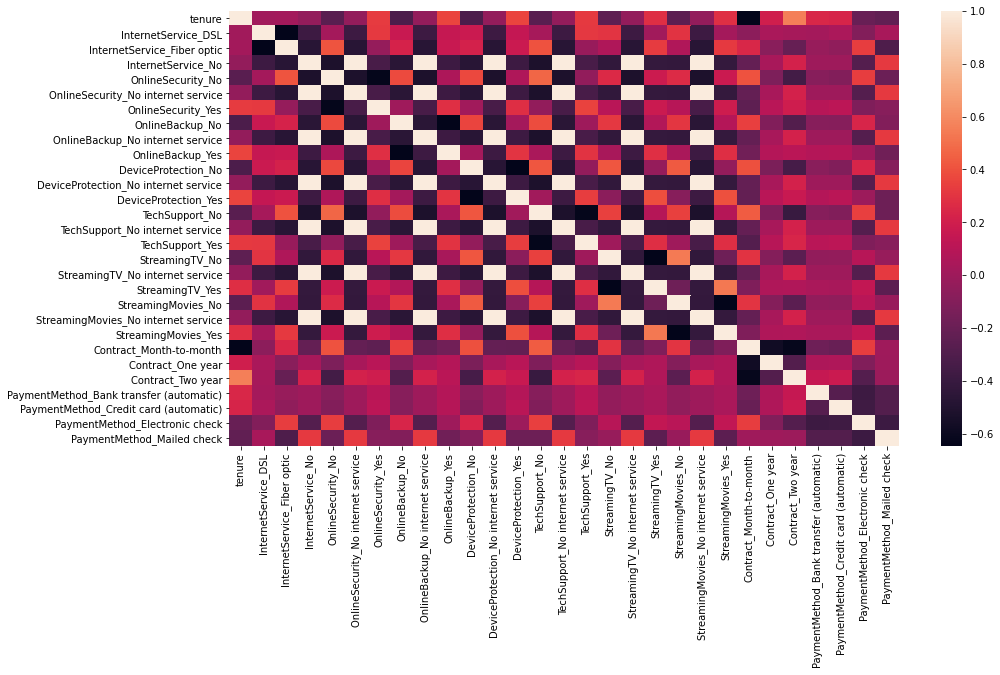

In [ ]:
print(df_dummies2.corr())
plt.figure(figsize=(15,8))
sns.heatmap(df_dummies2.corr())

Após uma análise visual rápida, não foi observada uma redundância significativa entre duas categorias inteiras ou mesmo da variável numérica com as demais.

#Modelagem - Decision Tree

In [ ]:
df_dummies3 = df[['tenure', 'InternetService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                          'StreamingTV', 'StreamingMovies', 'Contract', 
                          'PaymentMethod', 'Churn']]
df_dummies3 = pd.get_dummies(df_dummies3)
df_dummies3.head()

,tenure,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,2,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
X = df_dummies3.drop('Churn',axis=1)  
y= df_dummies3['Churn']

In [ ]:
from sklearn.model_selection import train_test_split  #Parte do scikit-learn que faz a divisão de treino e teste automaticamente.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)  
# Divide aleatoriamente em X de treino e de teste e y de treino e de teste, sendo treino 70% e teste 30%.

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importante a árvore de decisão do sckit-learn

dtree = DecisionTreeClassifier(criterion='entropy') #Criando a árvore de decisão com o critério da entropia

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predic = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report #Importa a ferramenta de avaliação de resultado do scikit-learn. 

print(classification_report(y_test,predic)) #Comparar os valores preditos com o gabarito das classificação de teste.

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2045
           1       0.51      0.49      0.50       773

    accuracy                           0.73      2818
   macro avg       0.66      0.65      0.66      2818
weighted avg       0.73      0.73      0.73      2818



#Modelagem - Random Forest



In [48]:
df_dummies4 = df[['tenure', 'InternetService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                          'StreamingTV', 'StreamingMovies', 'Contract', 
                          'PaymentMethod', 'Churn']]
df_dummies4 = pd.get_dummies(df_dummies4)
df_dummies4.head()

,tenure,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,2,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [49]:
X = df_dummies4.drop('Churn',axis=1)  
y= df_dummies4['Churn']

In [50]:
from sklearn.model_selection import train_test_split  #Parte do scikit-learn que faz a divisão de treino e teste automaticamente.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)  
# Divide aleatoriamente em X de treino e de teste e y de treino e de teste, sendo treino 70% e teste 30%.

In [51]:
from sklearn.ensemble import RandomForestClassifier #Importar a floresta aleatória do scikit-learn.

rfc = RandomForestClassifier(n_estimators=5,criterion='entropy') #Gerar a floresta escolhendo a quantidade de árvores.

In [52]:
rfc.fit(X_train, y_train) #Treinar a floresta

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
predic = rfc.predict(X_test)

In [54]:
from sklearn.metrics import classification_report #Importa a ferramenta de avaliação de resultado do scikit-learn. 

print(classification_report(y_test,predic)) #Comparar os valores preditos com o gabarito das classificação de teste.

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2067
           1       0.55      0.51      0.53       751

    accuracy                           0.76      2818
   macro avg       0.69      0.68      0.68      2818
weighted avg       0.75      0.76      0.76      2818



In [55]:
predic #verificando que os resultados são binários

array([0, 0, 0, ..., 0, 0, 1])